In [12]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [14]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

837


In [16]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [20]:
X_train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
759,156-95-3964,A,Yangon,Normal,Female,Food and beverages,55.39,4,11.0780,3/25/2019,15:19,Ewallet,221.56,4.761905,11.0780,8.0
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
909,624-01-8356,B,Mandalay,Normal,Female,Home and lifestyle,49.01,10,24.5050,1/27/2019,10:44,Credit card,490.10,4.761905,24.5050,4.2
455,767-54-1907,B,Mandalay,Member,Female,Fashion accessories,29.56,5,7.3900,2/13/2019,16:59,Cash,147.80,4.761905,7.3900,6.9
778,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,3/20/2019,17:52,Cash,126.25,4.761905,6.3125,6.1


In [19]:
y_train.head()

759    232.6380
13     453.4950
909    514.6050
455    155.1900
778    132.5625
Name: Total, dtype: float64

In [31]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 759 to 624
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product line             700 non-null    object 
 6   Unit price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax 5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross margin percentage  700 non-null    float64
 14  gross income             700 

In [33]:
X_train_copy.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [34]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
759,55.39,4,11.0780,221.56,4.761905,11.0780,8.0
13,43.19,10,21.5950,431.90,4.761905,21.5950,8.2
909,49.01,10,24.5050,490.10,4.761905,24.5050,4.2
455,29.56,5,7.3900,147.80,4.761905,7.3900,6.9
778,25.25,5,6.3125,126.25,4.761905,6.3125,6.1


In [35]:
num_data.describe()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,56.388243,5.555714,15.582836,311.656714,4.761905e+00,15.582836,6.934286
std,26.448539,2.923641,11.699052,233.981034,5.244000e-14,11.699052,1.709578
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.610000,3.000000,6.093750,121.875000,4.761905e+00,6.093750,5.500000
50%,55.740000,5.000000,12.588750,251.775000,4.761905e+00,12.588750,6.900000
75%,78.380000,8.000000,22.371750,447.435000,4.761905e+00,22.371750,8.400000
max,99.960000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit price'>

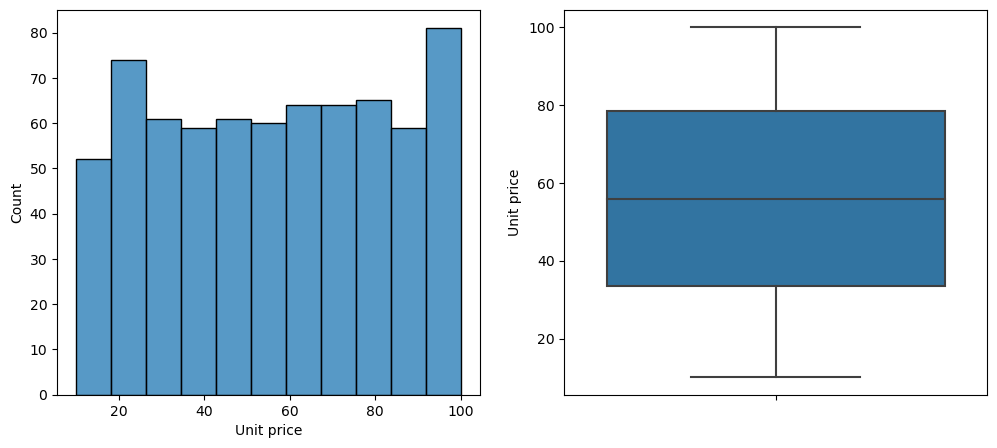

In [54]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit price", ax=ax[1])